In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt

In [5]:
#Read The CVS File
file_path = r"C:\Users\youse\Desktop\ML Project\NBA Eastern Conference Final WinPrediction\NBA_2024_Eastern_Conference_Standing.csv"
df = pd.read_csv(file_path)
df.head()

,Club Name,W,L,W/L%,SOS,rSOS,SRS,Best,Worst,Win Finals
0,Boston Celtics,58.5,21.5,0.731,3.28,-0.46,16.72,73-7,45-35,44.50%
1,Philadelphia 76ers,53.1,26.9,0.664,-0.06,0.13,11.19,68-12,37-43,14.20%
2,New York Knicks,44.7,35.3,0.559,0.84,0.39,5.22,60-20,30-50,2.10%
3,Atlanta Hawks,43.8,36.2,0.547,0.13,0.39,3.46,58-22,28-52,1.10%
4,Indiana Pacers,43.3,36.7,0.541,-1.91,0.61,2.54,58-22,29-51,0.90%


In [6]:
features = df[['W', 'L', 'W/L%', 'SOS', 'rSOS', 'SRS', 'Best', 'Worst']]

X = features  # Features (features matrix)
y = df['Win Finals']  # Target (target vector)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the features matrix and target vector
print("Features Matrix (X) shape:", X.shape)
print("Target Vector (y) shape:", y.shape)


Features Matrix (X) shape: (15, 8)
Target Vector (y) shape: (15,)


In [7]:
# Display the first few rows of the features matrix and target vector
print("\nFirst few rows of Features Matrix (X):\n", X.head())
print("\nFirst few rows of Target Vector (y):\n", y.head())


First few rows of Features Matrix (X):
       W     L   W/L%   SOS  rSOS    SRS   Best  Worst
0  58.5  21.5  0.731  3.28 -0.46  16.72   73-7  45-35
1  53.1  26.9  0.664 -0.06  0.13  11.19  68-12  37-43
2  44.7  35.3  0.559  0.84  0.39   5.22  60-20  30-50
3  43.8  36.2  0.547  0.13  0.39   3.46  58-22  28-52
4  43.3  36.7  0.541 -1.91  0.61   2.54  58-22  29-51

First few rows of Target Vector (y):
 0    44.50%
1    14.20%
2     2.10%
3     1.10%
4     0.90%
Name: Win Finals, dtype: object


In [8]:
df.shape

(15, 10)

In [9]:
df.isnull().sum()


Club Name     0
W             0
L             0
W/L%          0
SOS           0
rSOS          0
SRS           0
Best          0
Worst         0
Win Finals    0
dtype: int64

In [10]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# Convert 'Best' and 'Worst' columns to numeric values
df['Best'] = df['Best'].apply(lambda x: np.mean(list(map(int, x.split('-')))) if isinstance(x, str) else x)
df['Worst'] = df['Worst'].apply(lambda x: np.mean(list(map(int, x.split('-')))) if isinstance(x, str) else x)

features = df[['W', 'L', 'SOS', 'rSOS', 'SRS', 'Best', 'Worst']]
X = features
y = df['W/L%']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
# Test the model on the testing set and evaluate the performance
score = model.score(X_test, y_test)
print(score)

0.7534065600267553


Mean Squared Error: 0.0044243794999999555


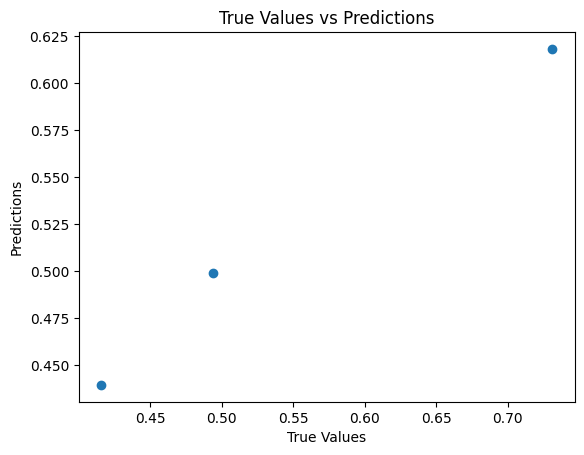

In [12]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Visualization (you can customize this based on your preferences)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predictions")
plt.show()


In [13]:
print(df.columns)


Index(['Club Name', 'W', 'L', 'W/L%', 'SOS', 'rSOS', 'SRS', 'Best', 'Worst',
       'Win Finals'],
      dtype='object')


In [14]:
# Assuming 'df' is your DataFrame
# Convert 'Best' and 'Worst' columns to numeric values
df['Best'] = df['Best'].apply(lambda x: np.mean(list(map(int, x.split('-')))) if isinstance(x, str) else x)
df['Worst'] = df['Worst'].apply(lambda x: np.mean(list(map(int, x.split('-')))) if isinstance(x, str) else x)

# Features and target
features = df[['W', 'L', 'SOS', 'rSOS', 'SRS', 'Best', 'Worst']]
target = df['W/L%']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Remember the club names for later use
train_club_names = df.loc[X_train.index, 'Club Name']
test_club_names = df.loc[X_test.index, 'Club Name']

# Create and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Create a new DataFrame with Club names and predictions
predictions_df = pd.DataFrame({'Club Name': test_club_names, 'Predicted_W/L%': predictions})

# Print the predictions for each Club
print(predictions_df)


         Club Name  Predicted_W/L%
9       Miami Heat         0.49933
11   Chicago Bulls         0.43960
0   Boston Celtics         0.61836


In [15]:
# Find the team with the highest predicted value
winning_team = predictions_df.loc[predictions_df['Predicted_W/L%'].idxmax(), 'Club Name']

# Display the message
print(f"The team that will win the finals is {winning_team}.")


The team that will win the finals is Boston Celtics.
